In [41]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation

from IPython.display import HTML

In [42]:
df = pd.read_csv("covid_19_data.csv",parse_dates = ['Last Update', 'ObservationDate'])
#df = df.drop(["SNo"], axis=1)
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0
...,...,...,...,...,...,...,...,...
4930,4931,2020-03-11,Mississippi,US,2020-03-10 02:33:04,0,0,0
4931,4932,2020-03-11,North Dakota,US,2020-03-10 02:33:04,0,0,0
4932,4933,2020-03-11,West Virginia,US,2020-03-10 02:33:04,0,0,0
4933,4934,2020-03-11,Wyoming,US,2020-03-10 02:33:04,0,0,0


In [43]:
df.isna().sum()

SNo                   0
ObservationDate       0
Province/State     1815
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [44]:
##listing the countries affected by covid
print("Number of countries affected by covid: ", len(df["Country/Region"].unique()))
print("Countries affected by the virus: ",df["Country/Region"].sort_values().unique())


Number of countries affected by covid:  128
Countries affected by the virus:  [' Azerbaijan' "('St. Martin',)" 'Afghanistan' 'Albania' 'Algeria'
 'Andorra' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'Canada' 'Channel Islands' 'Chile' 'Colombia'
 'Congo (Kinshasa)' 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia'
 'Faroe Islands' 'Finland' 'France' 'French Guiana' 'Georgia' 'Germany'
 'Gibraltar' 'Greece' 'Holy See' 'Honduras' 'Hong Kong' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Ivory Coast' 'Jamaica' 'Japan' 'Jordan' 'Kuwait' 'Latvia' 'Lebanon'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macau' 'Mainland China'
 'Malaysia' 'Maldives' 'Malta' 'Martinique' 'Mexico' 'Moldova' 'Monaco'
 'Mongolia' 'Morocco' 'Nepal' 'Nether

In [45]:
df.fillna('NA', inplace= True)
df.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1,0,0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6,0,0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1,0,0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0,0,0
5,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26,0,0
6,7,2020-01-22,Guangxi,Mainland China,2020-01-22 17:00:00,2,0,0
7,8,2020-01-22,Guizhou,Mainland China,2020-01-22 17:00:00,1,0,0
8,9,2020-01-22,Hainan,Mainland China,2020-01-22 17:00:00,4,0,0
9,10,2020-01-22,Hebei,Mainland China,2020-01-22 17:00:00,1,0,0


In [46]:
df_count = df.groupby(["Country/Region"], as_index= False).sum().sort_values(by="Confirmed", ascending = False)#.reset_index(drop=True)
df_top = df_count.head(10)
df_top

,Country/Region,SNo,Confirmed,Deaths,Recovered
69,Mainland China,2725932,2554465,80616,961283
110,South Korea,87497,80824,529,1496
57,Italy,85981,66824,3239,5454
53,Iran,65039,54206,1912,15142
87,Others,80813,17780,102,619
40,France,97783,9688,177,234
43,Germany,87193,8857,7,368
111,Spain,86149,7619,155,349
60,Japan,87760,7040,118,1034
122,US,3140954,5505,176,174


In [47]:
def draw_barchart(day, df_group):
    
    #Creating Top 10 Confirmed Dataset
    
    df_group = (df.groupby(['Country/Region'], as_index = False)
          .sum()
          .sort_values(by='Confirmed', ascending=False)
          .head(10)
          .reset_index(drop=True))

    df_group.drop(columns = ['SNo'], inplace = True)
    
    #Creating Bar Chart
    ax.clear()
    df_group = df_group[::-1]
    ax.barh(df_group['Country/Region'], df_group['Confirmed'])
    
    dx = df_group['Confirmed'].max() / 1000
    
    #Format Bar Chart
    for i, (value, name) in enumerate(zip(df_group['Confirmed'], df_group['Country/Region'])):
        
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='center')
        #ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    
    ax.text(1, 0.4, day.strftime("%d/%m/%Y"), transform=ax.transAxes, color='#777777', size=30, ha='right', weight=600)
    ax.text(0, 1.06, 'Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Confirmed Corona Virus cases in the world',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @Munindra', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)


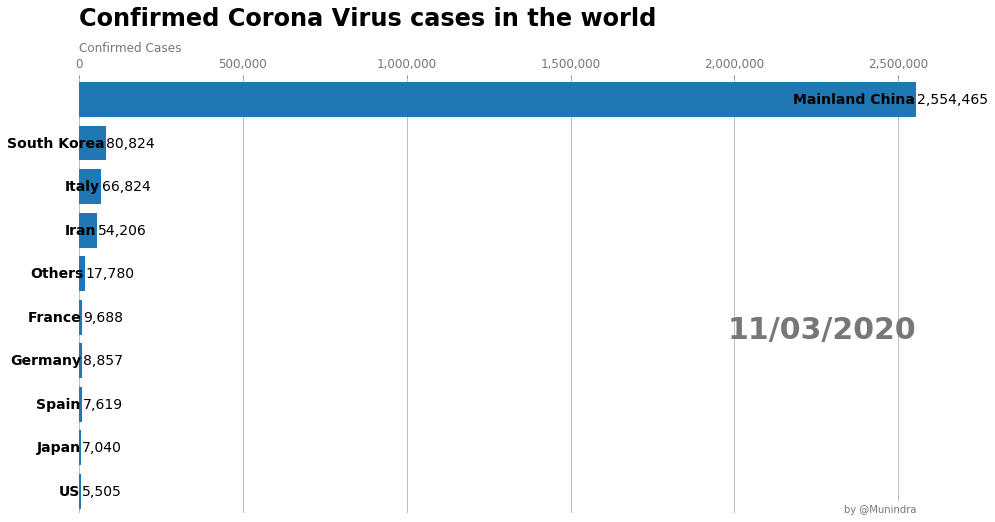

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
draw_barchart(df['ObservationDate'].max(), df_count)

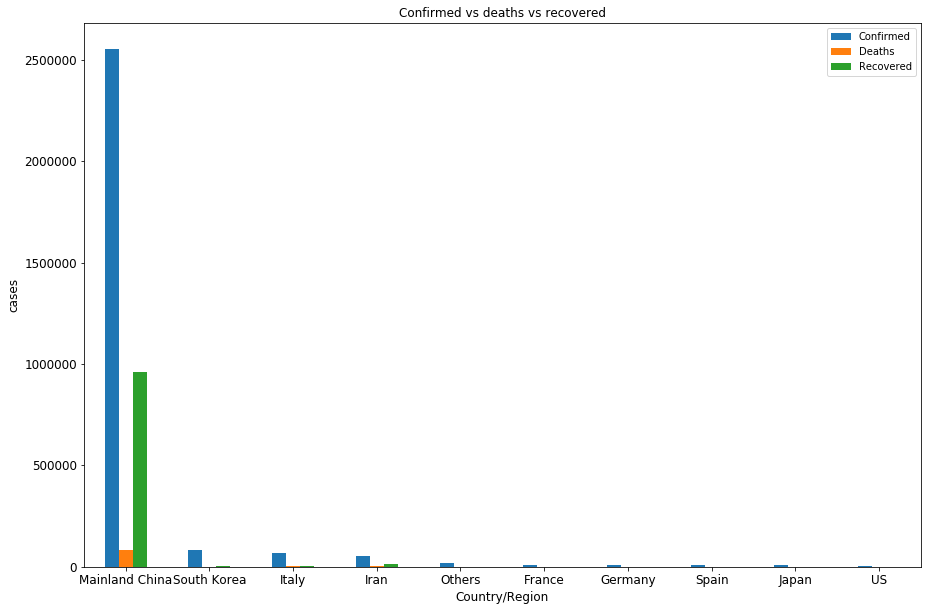

In [61]:
#df_top = df_top.drop(["SNo"], axis=1)

ax = df_top[['Confirmed','Deaths', 'Recovered']].plot(kind='bar', title ="Confirmed vs deaths vs recovered", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Country/Region", fontsize=12)
ax.set_ylabel("cases", fontsize=12)
ax.set_xticklabels(df_top["Country/Region"], rotation=0)
plt.show()